In [1]:
library('tidyverse')
library('readxl')
library('ggrepel')
library('tidymodels')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflow

In [2]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/arman/miniconda3/envs/obs/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] yardstick_1.1.0    workflowsets_1.0.0 workflows_1.1.2    tune_1.0.1        
 [5] rsample_1.1.1      recipes_1.0.3      parsnip_1.0.3      modeldata_1.0.1   
 [9] infer_1.0.4        dials_1.1.0        scales_1.2.1       broom_1.0.2       
[13] tidymodels_1.0.0   ggrepel_0.9.2      readxl_1.4.1       forcats_0.5.2     
[17] stringr_1.5.0      dplyr_1.0.10       purrr_1.0.1        readr_2.1.3       
[21] tidyr_1.3.0        tibble_3.1.8       ggplot2_3.4.0      tidyverse_1.3.2   

loaded via a namespace (and not attached):
 [1] fs_1.5.2            lubridate_1.9.0     DiceDesig

In [3]:
ihc_metrics <-
    read_tsv('ihc_metrics.tsv') %>%
    pivot_longer(
        names_to='metric',
        values_to='estimate',
        -c(`sample`, `Region`)
    )

ihc_metrics

Rows: 22 Columns: 14
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): sample, Region
dbl (12): CD3+ cells/mm^2, CD4+ cells/mm^2, CD8 + cells/mm^2, CD20 + cells/m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sample,Region,metric,estimate
<chr>,<chr>,<chr>,<dbl>
NMS22-13453,Peritumor,CD3+ cells/mm^2,952.997759
NMS22-13453,Peritumor,CD4+ cells/mm^2,313.827000
NMS22-13453,Peritumor,CD8 + cells/mm^2,712.247908
NMS22-13453,Peritumor,CD20 + cells/mm^2,123.254960
NMS22-13453,Peritumor,MECA-79 + cells/mm^2,184.626875
NMS22-13453,Peritumor,CD56 + cells/mm^2,14.544143
NMS22-13453,Peritumor,FOXP-3 + cells/mm^2,221.105703
NMS22-13453,Peritumor,CD68 + cells/mm^2,589.670300
NMS22-13453,Peritumor,CD45 + cells/mm^2,274.825424


In [4]:
q3_norm_tbl_wide <-
    read_xlsx('Chondrosarcoma Nanostring 12082023.xlsx', sheet='Chondrosarcoma Nanostring') %>%
    filter(!is.na(`Probe Name`)) %>%
    mutate(across(starts_with('2023'), parse_double))

q3_norm_tbl_wide %>%
    head()

Probe Name,Annotation,Accession #,NS Probe ID,Class Name,Analyte Type,Species Name,Target Sequence,% Samples above Threshold,Comments,⋯,20231011_30102816220624-01_NMS23-1947_11.RCC,20231011_30102816220624-01_NMS23-471_10.RCC,20231011_30102816220624-01_S08-25548_01.RCC,20231011_30102816220624-01_S10-479_02.RCC,20231011_30102816220624-01_S14-11208_04.RCC,20231011_30102816220624-01_S14-9996_03.RCC,20231011_30102816220624-01_S15-16380_05.RCC,20231011_30102816220624-01_S17-4703_06.RCC,20231011_30102816220624-01_S18-6943_07.RCC,20231011_30102816220624-01_Standard_12.RCC
<chr>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M,NA,NM_000014.4,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,20964.50,10562.54,9032.59,12600.21,2929.25,7203.07,13218.09,15516.11,10711.54,1529.53
ACVR1C,NA,NM_145259.2,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,48.90,33.14,26.67,124.59,26.86,25.87,96.15,19.46,171.47,1175.21
ADAM12,NA,NM_003474.5,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,581.87,1505.33,1179.69,622.95,1203.00,1298.10,1078.38,990.61,367.95,736.13
ADGRE1,NA,NM_001256252.1,NA,Endogenous,mRNA,NA,NA,91.67,NA,⋯,29.34,7.21,23.04,191.04,8.18,32.92,9.83,20.39,25.01,900.30
ADM,NA,NM_001124.2,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,581.87,123.08,1876.84,1254.21,148.33,670.22,274.24,109.35,317.93,377.99
ADORA2A,NA,NM_000675.5,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,61.12,69.43,95.78,215.96,45.55,61.14,54.63,56.53,87.52,766.67


In [5]:
q3_norm_tbl <-
    q3_norm_tbl_wide %>%
    pivot_longer(
        names_to='sample',
        values_to='norm_exp',
        starts_with('2023')
    ) %>%
    mutate(
        `sample`=
            `sample` %>%
            str_replace_all('20231011_30102816220624-01_', '') %>%
            str_replace_all('\\.RCC', '')
    ) %>%
    select(`gene_symbol`=`Probe Name`, `sample`, `norm_exp`) %>%
    filter(
        `sample` != 'Standard_12',
        !str_detect(`gene_symbol`, 'POS_'),
        !str_detect(`gene_symbol`, 'NEG_')
    ) %>%
    mutate(
        `sample`=str_replace_all(`sample`, '_.*', ''),
        `norm_exp`=log10(`norm_exp` + 1)
    )
    

q3_norm_tbl %>%
    head()

gene_symbol,sample,norm_exp
<chr>,<chr>,<dbl>
A2M,NMS22-13453,4.278656
A2M,NMS22-28934,4.511058
A2M,NMS23-1947,4.321505
A2M,NMS23-471,4.023809
A2M,S08-25548,3.955860
A2M,S10-479,4.100412


In [6]:
q3_norm_tbl %>%
    write_csv('q3_normalized_exp-long_tbl-logp1.csv')

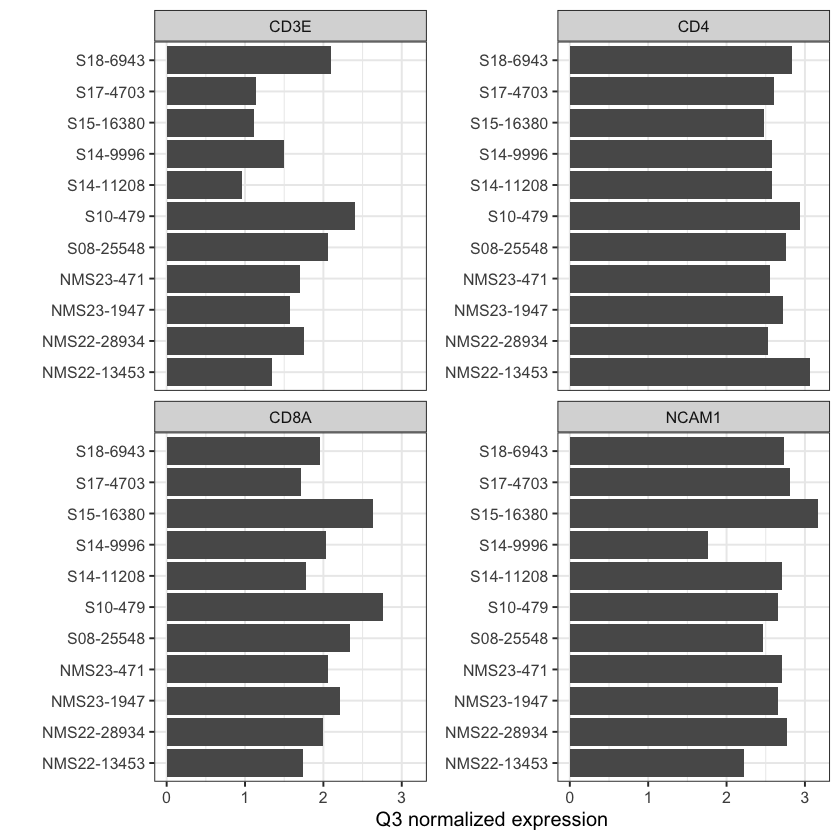

In [7]:
q3_norm_tbl %>%
    filter(`gene_symbol` %in% c('CD3E', 'CD8A', 'CD4', 'NCAM1')) %>%
    ggplot(aes(y=`sample`, x=`norm_exp`)) +
        geom_col() +
        facet_wrap(~`gene_symbol`, scales='free_y') +
        theme_bw(base_size=12) +
        labs(
            x='Q3 normalized expression',
            y=''
        )

In [8]:
c(
    ihc_metrics %>%
        distinct(`sample`) %>%
        pull(),
    q3_norm_tbl %>%
        distinct(`sample`) %>%
        pull()
) %>%
    table()

.
NMS22-13453 NMS22-28934  NMS23-1947   NMS23-471   S08-25548     S10-479 
          2           2           2           2           2           2 
  S14-11208    S14-9996   S15-16380    S17-4703    S18-6943 
          2           2           2           2           2 

In [9]:
correlate_with_gene <-
    function(ihc_variable, region_variable, gene_variable)  {        
        ihc_vector <-
            ihc_metrics %>%
            filter(
                `Region` == region_variable,
                `metric` == ihc_variable
            ) %>%
            select(`sample`, `estimate`)
        
        gene_vector <-
            q3_norm_tbl %>%
            filter(`gene_symbol` == gene_variable)
        
        cor.test(gene_vector$`norm_exp`, ihc_vector$`estimate`, method='pearson', na.rm=TRUE) %>%
            tidy() %>%
            mutate(
                `ihc_metric`=ihc_variable,
                `ihc_region`=region_variable,
                `gene_symbol`=gene_variable
            )
    }

correlate_with_gene('CD4+ cells/mm^2', 'Peritumor', 'CD4')

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.7013824,2.603426,0.03524893,7,0.06975095,0.9315739,Pearson's product-moment correlation,two.sided,CD4+ cells/mm^2,Peritumor,CD4


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_label_repel()`).”


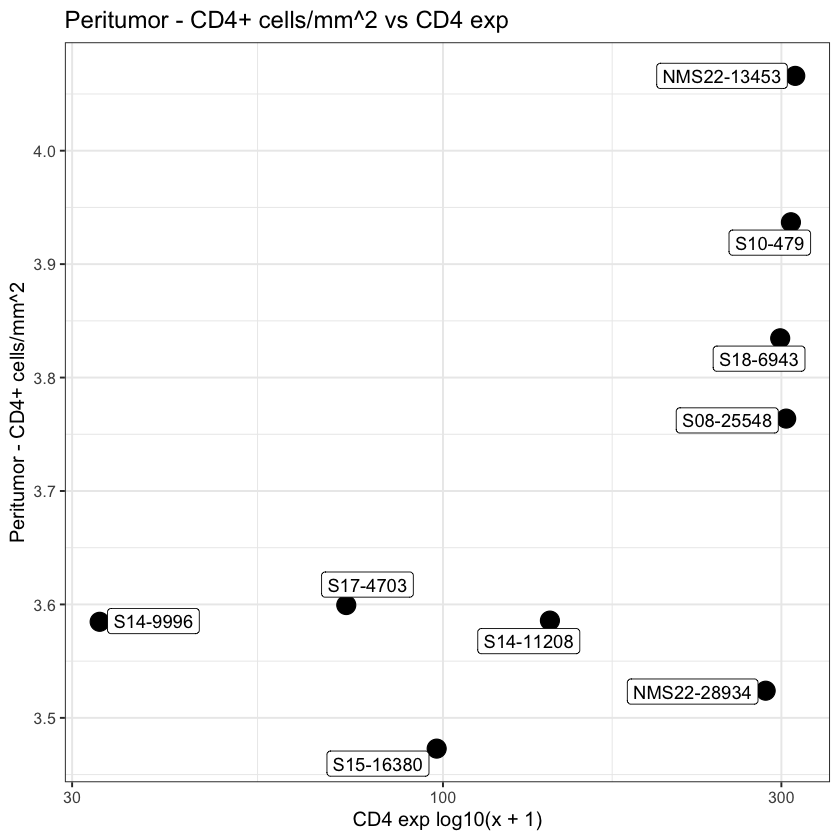

In [10]:
plot_correlation_with_gene <-
    function(ihc_variable, region_variable, gene_variable)  {        
        ihc_vector <-
            ihc_metrics %>%
            filter(
                `Region` == region_variable,
                `metric` == ihc_variable
            ) %>%
            select(`sample`, `estimate`)
        
        gene_vector <-
            q3_norm_tbl %>%
            filter(`gene_symbol` == gene_variable)
        
        ihc_vector %>%
            left_join(gene_vector, by='sample') %>%
            ggplot(aes(x=`estimate`, y=`norm_exp` + 1)) +
                geom_point(size=5) +
                geom_label_repel(aes(label=`sample`)) +
                labs(
                    title=paste(region_variable, ' - ', ihc_variable, ' vs ', gene_variable, ' exp', sep=''),
                    x=paste(gene_variable, ' exp log10(x + 1)', sep=''),
                    y=paste(region_variable, ' - ', ihc_variable, sep=''),
                ) +
                scale_x_log10() +
                theme_bw(base_size=12)
    }

plot_correlation_with_gene('CD4+ cells/mm^2', 'Peritumor', 'CD4')

In [11]:
system.time({
    
cor_tbl <-
    ihc_metrics %>%
    distinct(`Region`) %>%
    pull() %>%
    map_df(function(region_variable) {
        ihc_metrics %>%
            distinct(`metric`) %>%
            pull() %>%
            map_df(function(ihc_variable) {
                q3_norm_tbl %>%
                    distinct(`gene_symbol`) %>%
                    pull() %>%
                    map_df(~correlate_with_gene(ihc_variable=ihc_variable, region_variable=region_variable, .))
            })
    })
    
})

   user  system elapsed 
246.750   4.060 262.294 

In [12]:
cor_tbl %>%
    arrange(`p.value`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.9273219,7.433148,3.961990e-05,9,0.7379537,0.9813142,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,IRF4
0.9159437,6.847209,7.496771e-05,9,0.7015202,0.9782936,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,CD2
0.9069647,6.459762,1.168017e-04,9,0.6735391,0.9758911,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Tumor,IL1A
0.9228197,6.775468,1.413197e-04,8,0.6997982,0.9819197,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CD19
0.9025834,6.289560,1.427442e-04,9,0.6601242,0.9747127,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,MAP3K8
0.9998483,81.187021,1.516799e-04,2,0.9923843,0.9999970,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,BAD
0.8995899,6.179412,1.628456e-04,9,0.6510467,0.9739052,Pearson's product-moment correlation,two.sided,CD68 + cells/mm^2,Tumor,IFNA1
0.9124562,6.307373,2.309459e-04,8,0.6647100,0.9794069,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CLECL1
0.9116569,6.274587,2.392590e-04,8,0.6620486,0.9792123,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,TCL1A


In [13]:
cor_tbl %>%
    arrange(-`estimate`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.9998483,81.187021,0.0001516799,2,0.9923843,0.9999970,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,BAD
0.9980675,22.714734,0.0019325215,2,0.9070439,0.9999616,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,PRKX
0.9979199,21.891757,0.0020800896,2,0.9002926,0.9999587,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Peritumor,CXCL13
0.9975774,20.279864,0.0024226434,2,0.8847996,0.9999519,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,CD58
0.9959308,15.628399,0.0040692447,2,0.8136517,0.9999191,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,IL4
0.9958813,15.533655,0.0041187279,2,0.8115949,0.9999181,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,IRF9
0.9958529,15.480085,0.0041471062,2,0.8104174,0.9999175,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,PVR
0.9949863,14.069675,0.0050136750,2,0.7751677,0.9999003,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,AXL
0.9947594,13.759272,0.0052406435,2,0.7661560,0.9998957,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Peritumor,COL5A1


In [14]:
cor_tbl %>%
    arrange(`estimate`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
-0.9972241,-18.940500,0.002775913,2,-0.9999448,-0.869078862,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Peritumor,NCAM1
-0.9958581,-15.489826,0.004141924,2,-0.9999176,-0.810632319,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,SOCS1
-0.9939314,-12.778309,0.006068563,2,-0.9998792,-0.734028593,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Peritumor,CDH2
-0.9901672,-10.010129,0.009832822,2,-0.9998039,-0.601286647,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,RNLS
-0.9897679,-9.809883,0.010232144,2,-0.9997959,-0.588360988,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,ERCC3
-0.9846310,-7.973074,0.015369001,2,-0.9996927,-0.438565965,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,TLR3
-0.9823155,-7.419644,0.017684513,2,-0.9996460,-0.379693788,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,NOS2
-0.9794642,-6.870277,0.020535770,2,-0.9995884,-0.313338098,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,IL16
-0.9787174,-6.744784,0.021282605,2,-0.9995732,-0.296969819,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,RAD50


In [15]:
cor_tbl %>%
    arrange(`p.value`) %>%
    filter(`ihc_metric` != 'CD206+ cells/mm^2')
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.9273219,7.433148,3.961990e-05,9,0.7379537,0.9813142,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,IRF4
0.9159437,6.847209,7.496771e-05,9,0.7015202,0.9782936,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,CD2
0.9069647,6.459762,1.168017e-04,9,0.6735391,0.9758911,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Tumor,IL1A
0.9228197,6.775468,1.413197e-04,8,0.6997982,0.9819197,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CD19
0.9025834,6.289560,1.427442e-04,9,0.6601242,0.9747127,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,MAP3K8
0.8995899,6.179412,1.628456e-04,9,0.6510467,0.9739052,Pearson's product-moment correlation,two.sided,CD68 + cells/mm^2,Tumor,IFNA1
0.9124562,6.307373,2.309459e-04,8,0.6647100,0.9794069,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CLECL1
0.9116569,6.274587,2.392590e-04,8,0.6620486,0.9792123,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,TCL1A
0.9113068,6.260361,2.429683e-04,8,0.6608849,0.9791270,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CD79A


[1] 30

In [16]:
cor_tbl %>%
    arrange(`estimate`) %>%
    filter(`ihc_metric` != 'CD206+ cells/mm^2')
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
-0.9094831,-5.787897,0.0006717999,7,-0.9810458,-0.6196110,Pearson's product-moment correlation,two.sided,CD4+ cells/mm^2,Tumor,FZD8
-0.9056706,-6.041819,0.0003087018,8,-0.9777504,-0.6423130,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,BIRC5
-0.8907926,-5.186539,0.0012716979,7,-0.9769537,-0.5550146,Pearson's product-moment correlation,two.sided,iNOS + cells/mm^2,Tumor,CD48
-0.8891610,-5.141013,0.0013372382,7,-0.9765934,-0.5495615,Pearson's product-moment correlation,two.sided,iNOS + cells/mm^2,Tumor,MB21D1
-0.8668114,-3.887101,0.0115586974,5,-0.9801000,-0.3275921,Pearson's product-moment correlation,two.sided,CD56 + cells/mm^2,Peritumor,CCND2
-0.8656072,-4.573744,0.0025627138,7,-0.9713375,-0.4739370,Pearson's product-moment correlation,two.sided,iNOS + cells/mm^2,Tumor,CD45RO
-0.8617677,-4.494399,0.0028171788,7,-0.9704708,-0.4621336,Pearson's product-moment correlation,two.sided,iNOS + cells/mm^2,Tumor,GBP2
-0.8612016,-4.792487,0.0013686202,8,-0.9666670,-0.5058828,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,PLOD2
-0.8600331,-5.056657,0.0006841360,9,-0.9630558,-0.5374195,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Peritumor,NCAM1


[1] 30

In [17]:
cor_tbl %>%
    arrange(-`estimate`) %>%
    filter(`ihc_metric` != 'CD206+ cells/mm^2')
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.9273219,7.433148,3.961990e-05,9,0.7379537,0.9813142,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,IRF4
0.9228197,6.775468,1.413197e-04,8,0.6997982,0.9819197,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CD19
0.9159437,6.847209,7.496771e-05,9,0.7015202,0.9782936,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,CD2
0.9124562,6.307373,2.309459e-04,8,0.6647100,0.9794069,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CLECL1
0.9116569,6.274587,2.392590e-04,8,0.6620486,0.9792123,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,TCL1A
0.9113068,6.260361,2.429683e-04,8,0.6608849,0.9791270,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CD79A
0.9102275,6.216997,2.546721e-04,8,0.6573044,0.9788638,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Tumor,POLD1
0.9069647,6.459762,1.168017e-04,9,0.6735391,0.9758911,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Tumor,IL1A
0.9029667,5.943480,3.444869e-04,8,0.6335120,0.9770878,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CD45RA


[1] 30

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_label_repel()`).”


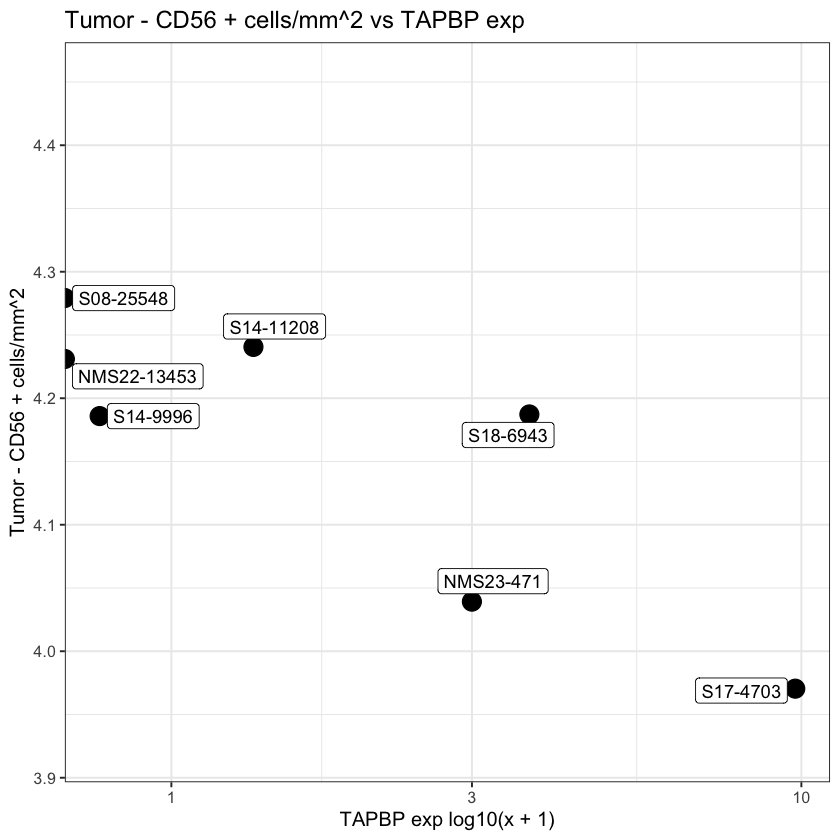

In [18]:
plot_correlation_with_gene('CD56 + cells/mm^2', 'Tumor', 'TAPBP')

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_label_repel()`).”


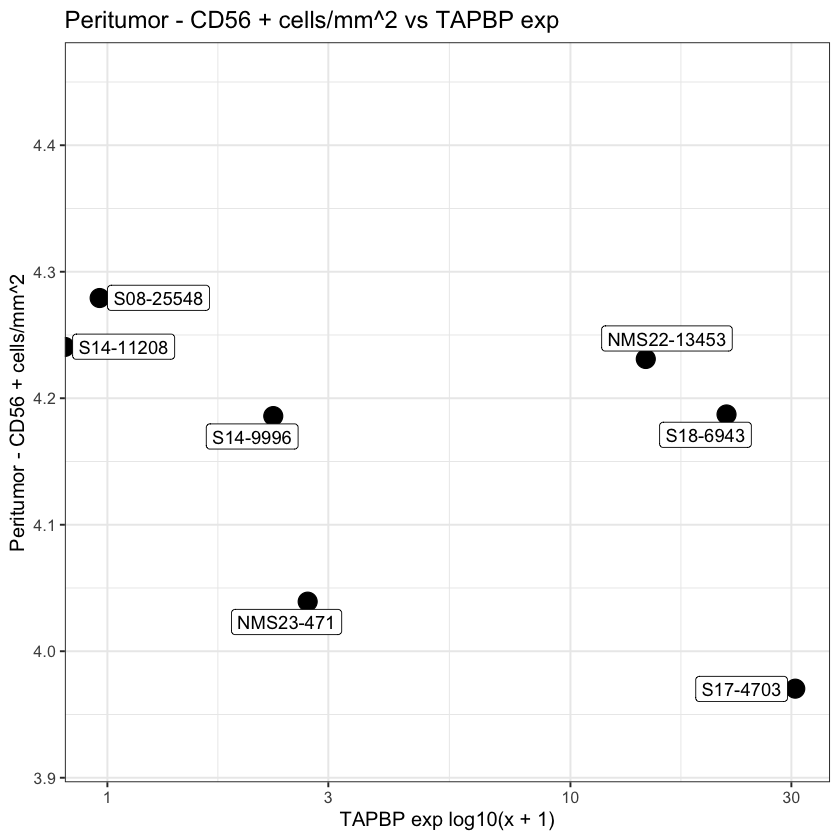

In [19]:
plot_correlation_with_gene('CD56 + cells/mm^2', 'Peritumor', 'TAPBP')

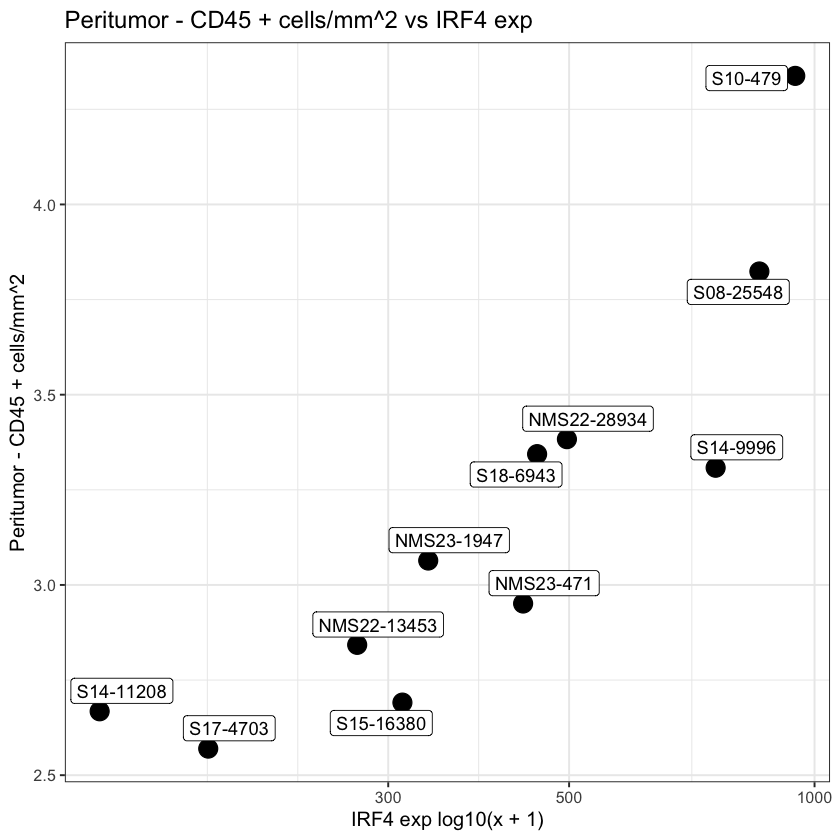

In [20]:
plot_correlation_with_gene('CD45 + cells/mm^2', 'Peritumor', 'IRF4')

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_label_repel()`).”


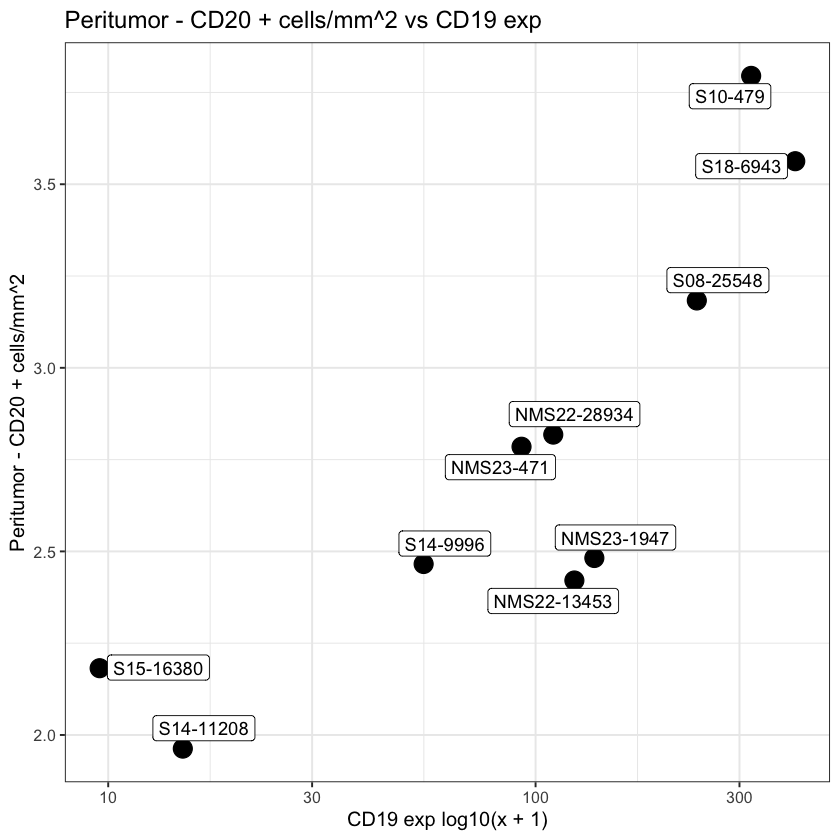

In [21]:
plot_correlation_with_gene('CD20 + cells/mm^2', 'Peritumor', 'CD19')

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_label_repel()`).”


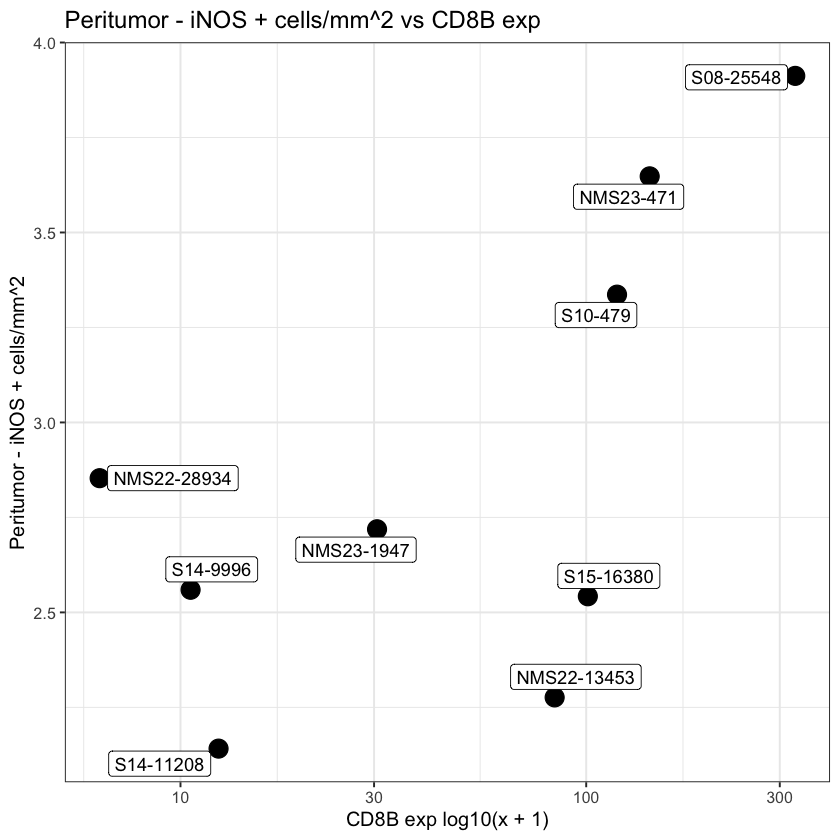

In [22]:
plot_correlation_with_gene('iNOS + cells/mm^2', 'Peritumor', 'CD8B')

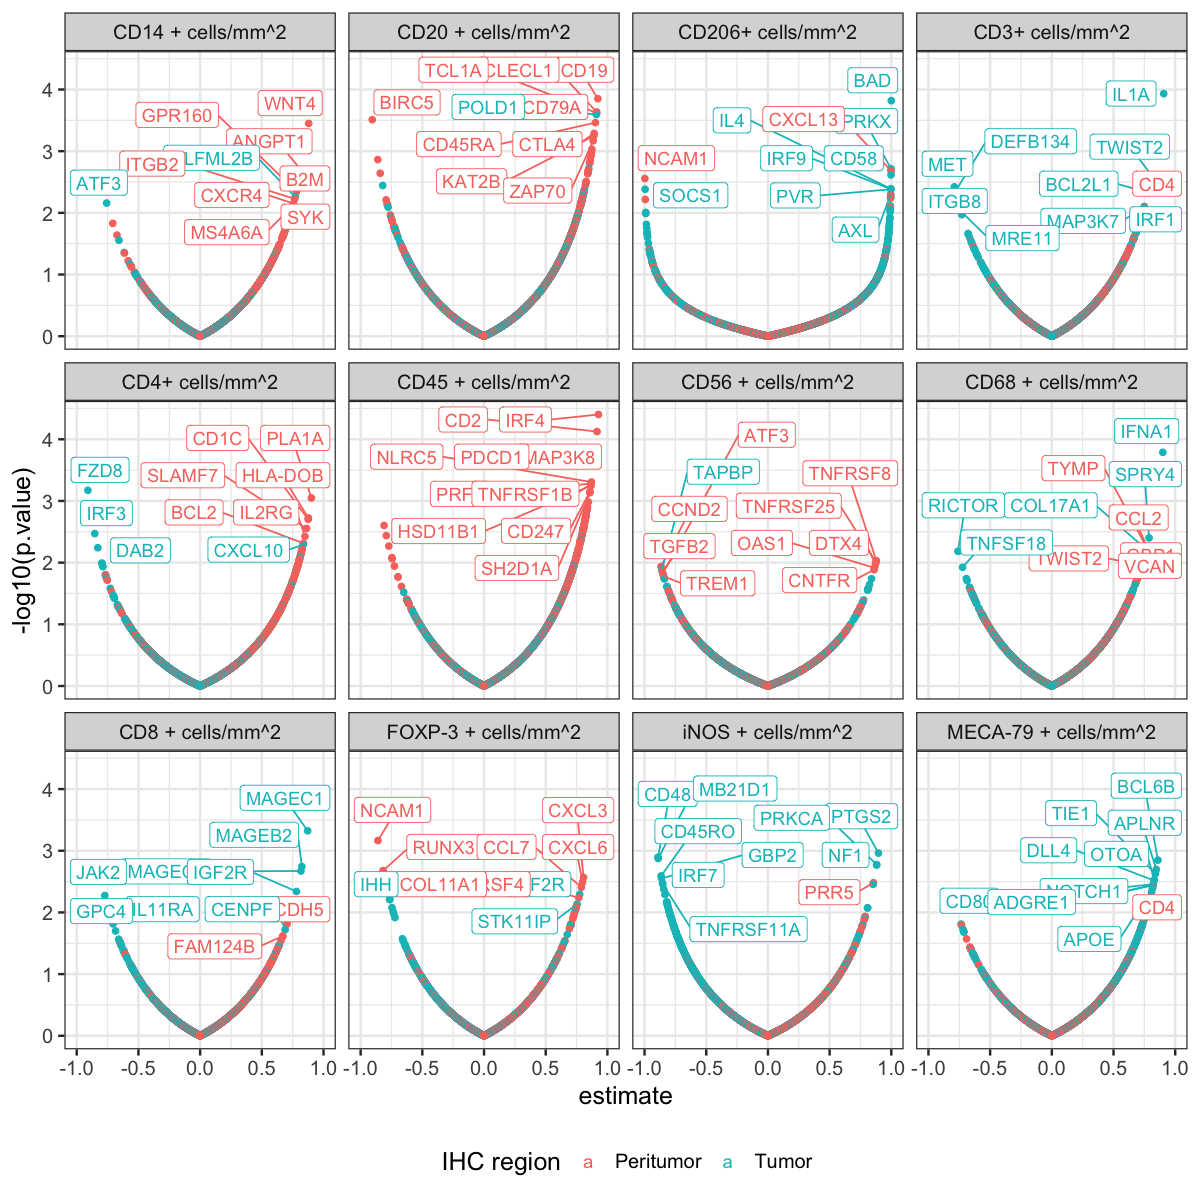

In [23]:
options(repr.plot.width=10, repr.plot.height=10)

cor_tbl %>%
    group_by(`ihc_metric`) %>%
    arrange(`p.value`) %>%
    mutate(`rank`=1:n()) %>%
    ungroup() %>%
    mutate(`label`=case_when(`rank` <= 10 ~ `gene_symbol`, TRUE ~ '')) %>%
    ggplot(aes(x=`estimate`, y=-log10(`p.value`), color=`ihc_region`)) +
        geom_point() +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf) +
        facet_wrap(~`ihc_metric`) +
        xlim(-1, 1) +
        theme_bw(base_size=15) +
        theme(legend.position='bottom') +
        labs(
            color='IHC region'
        )

options(org_opts)

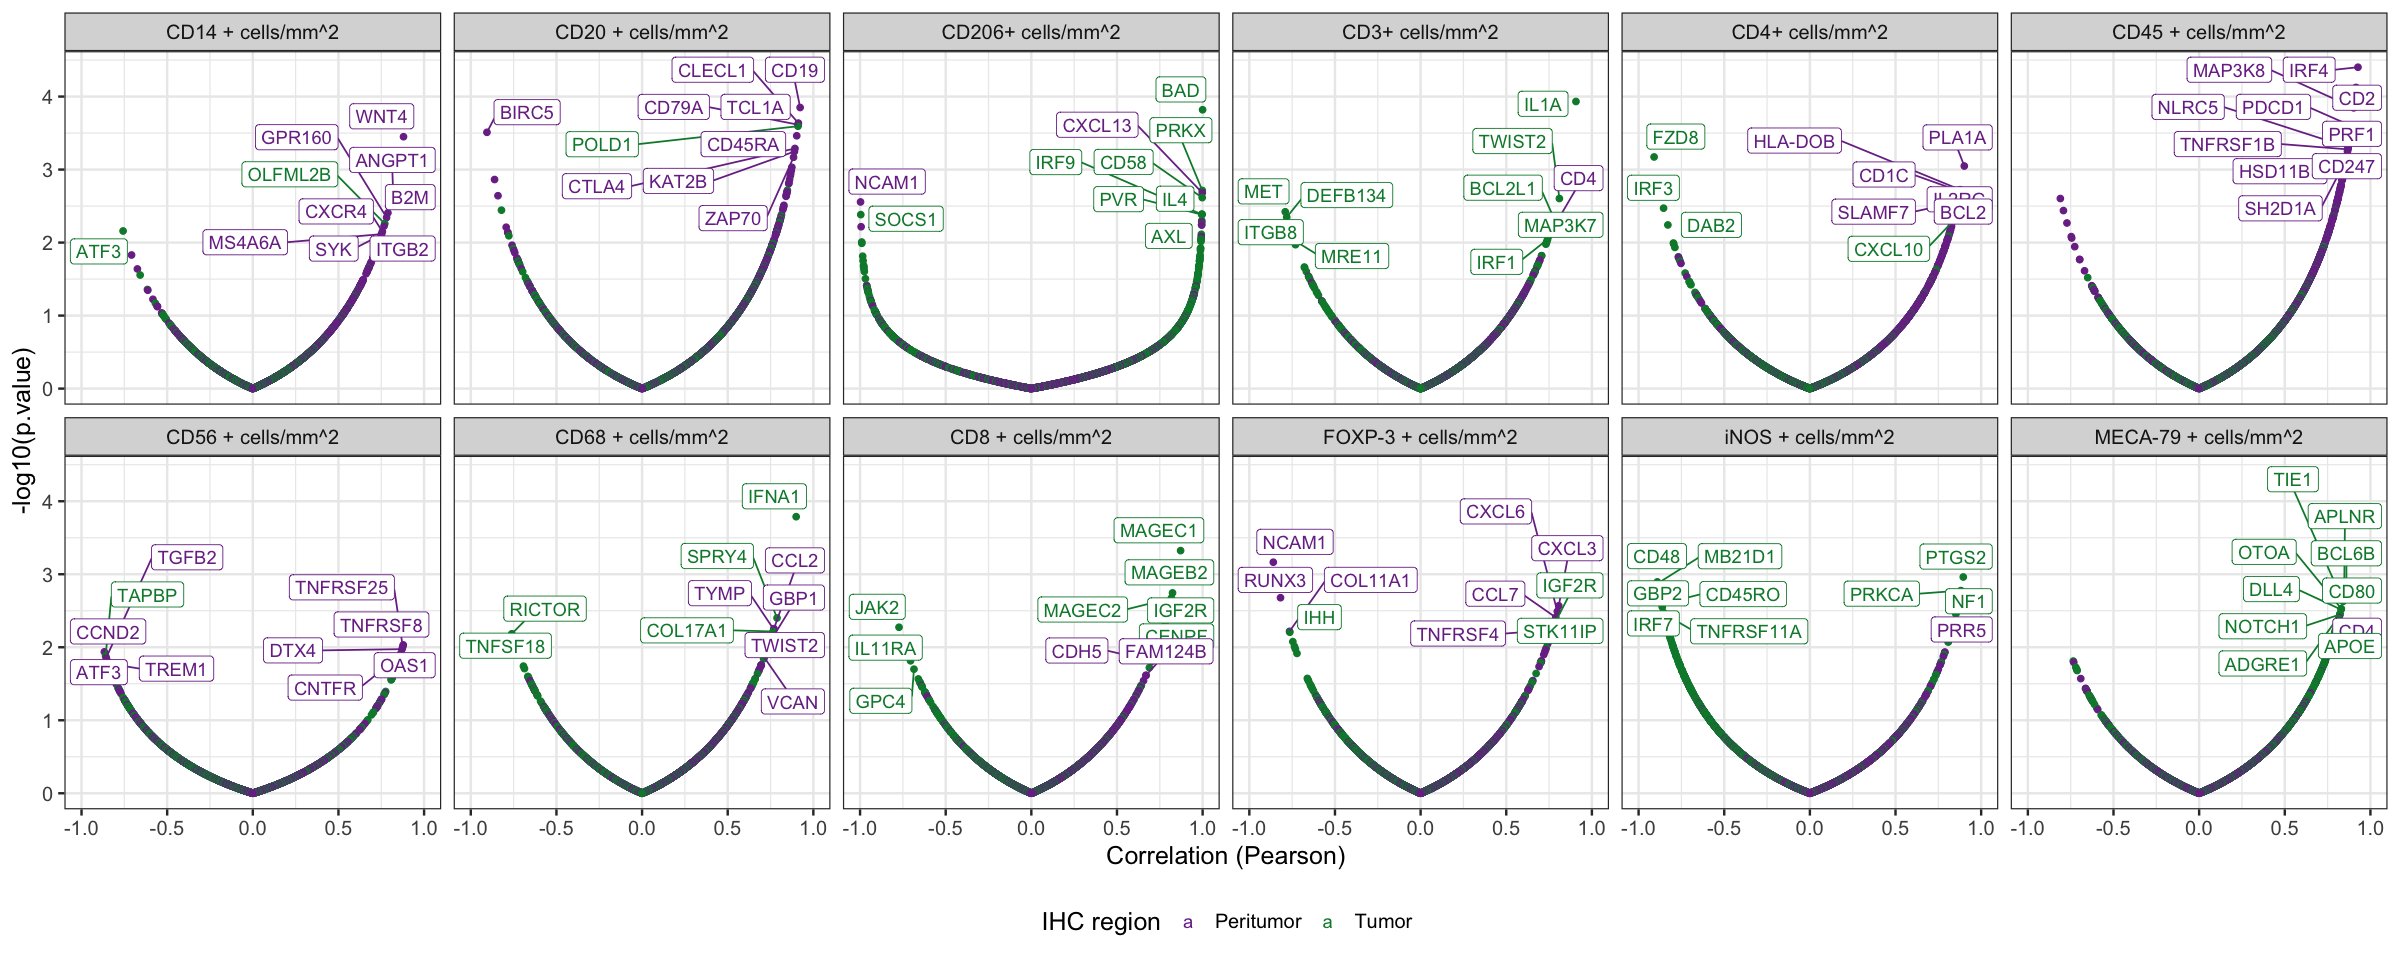

In [36]:
options(repr.plot.width=20, repr.plot.height=8)

mega_plot <-
    cor_tbl %>%
    group_by(`ihc_metric`) %>%
    arrange(`p.value`) %>%
    mutate(`rank`=1:n()) %>%
    ungroup() %>%
    mutate(`label`=case_when(`rank` <= 10 ~ `gene_symbol`, TRUE ~ '')) %>%
    ggplot(aes(x=`estimate`, y=-log10(`p.value`), color=`ihc_region`)) +
        geom_point() +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf) +
        facet_wrap(~`ihc_metric`, ncol=6) +
        xlim(-1, 1) +
        theme_bw(base_size=15) +
        theme(legend.position='bottom') +
        labs(
            color='IHC region',
            x='Correlation (Pearson)'
        ) +
        scale_color_manual(values=c('#7b3294', '#008837'))

mega_plot

options(org_opts)

In [37]:
ggsave(mega_plot, filename='Sarcoma-IHC_vs_Nanostring_plot.svg', width=20, height=8)

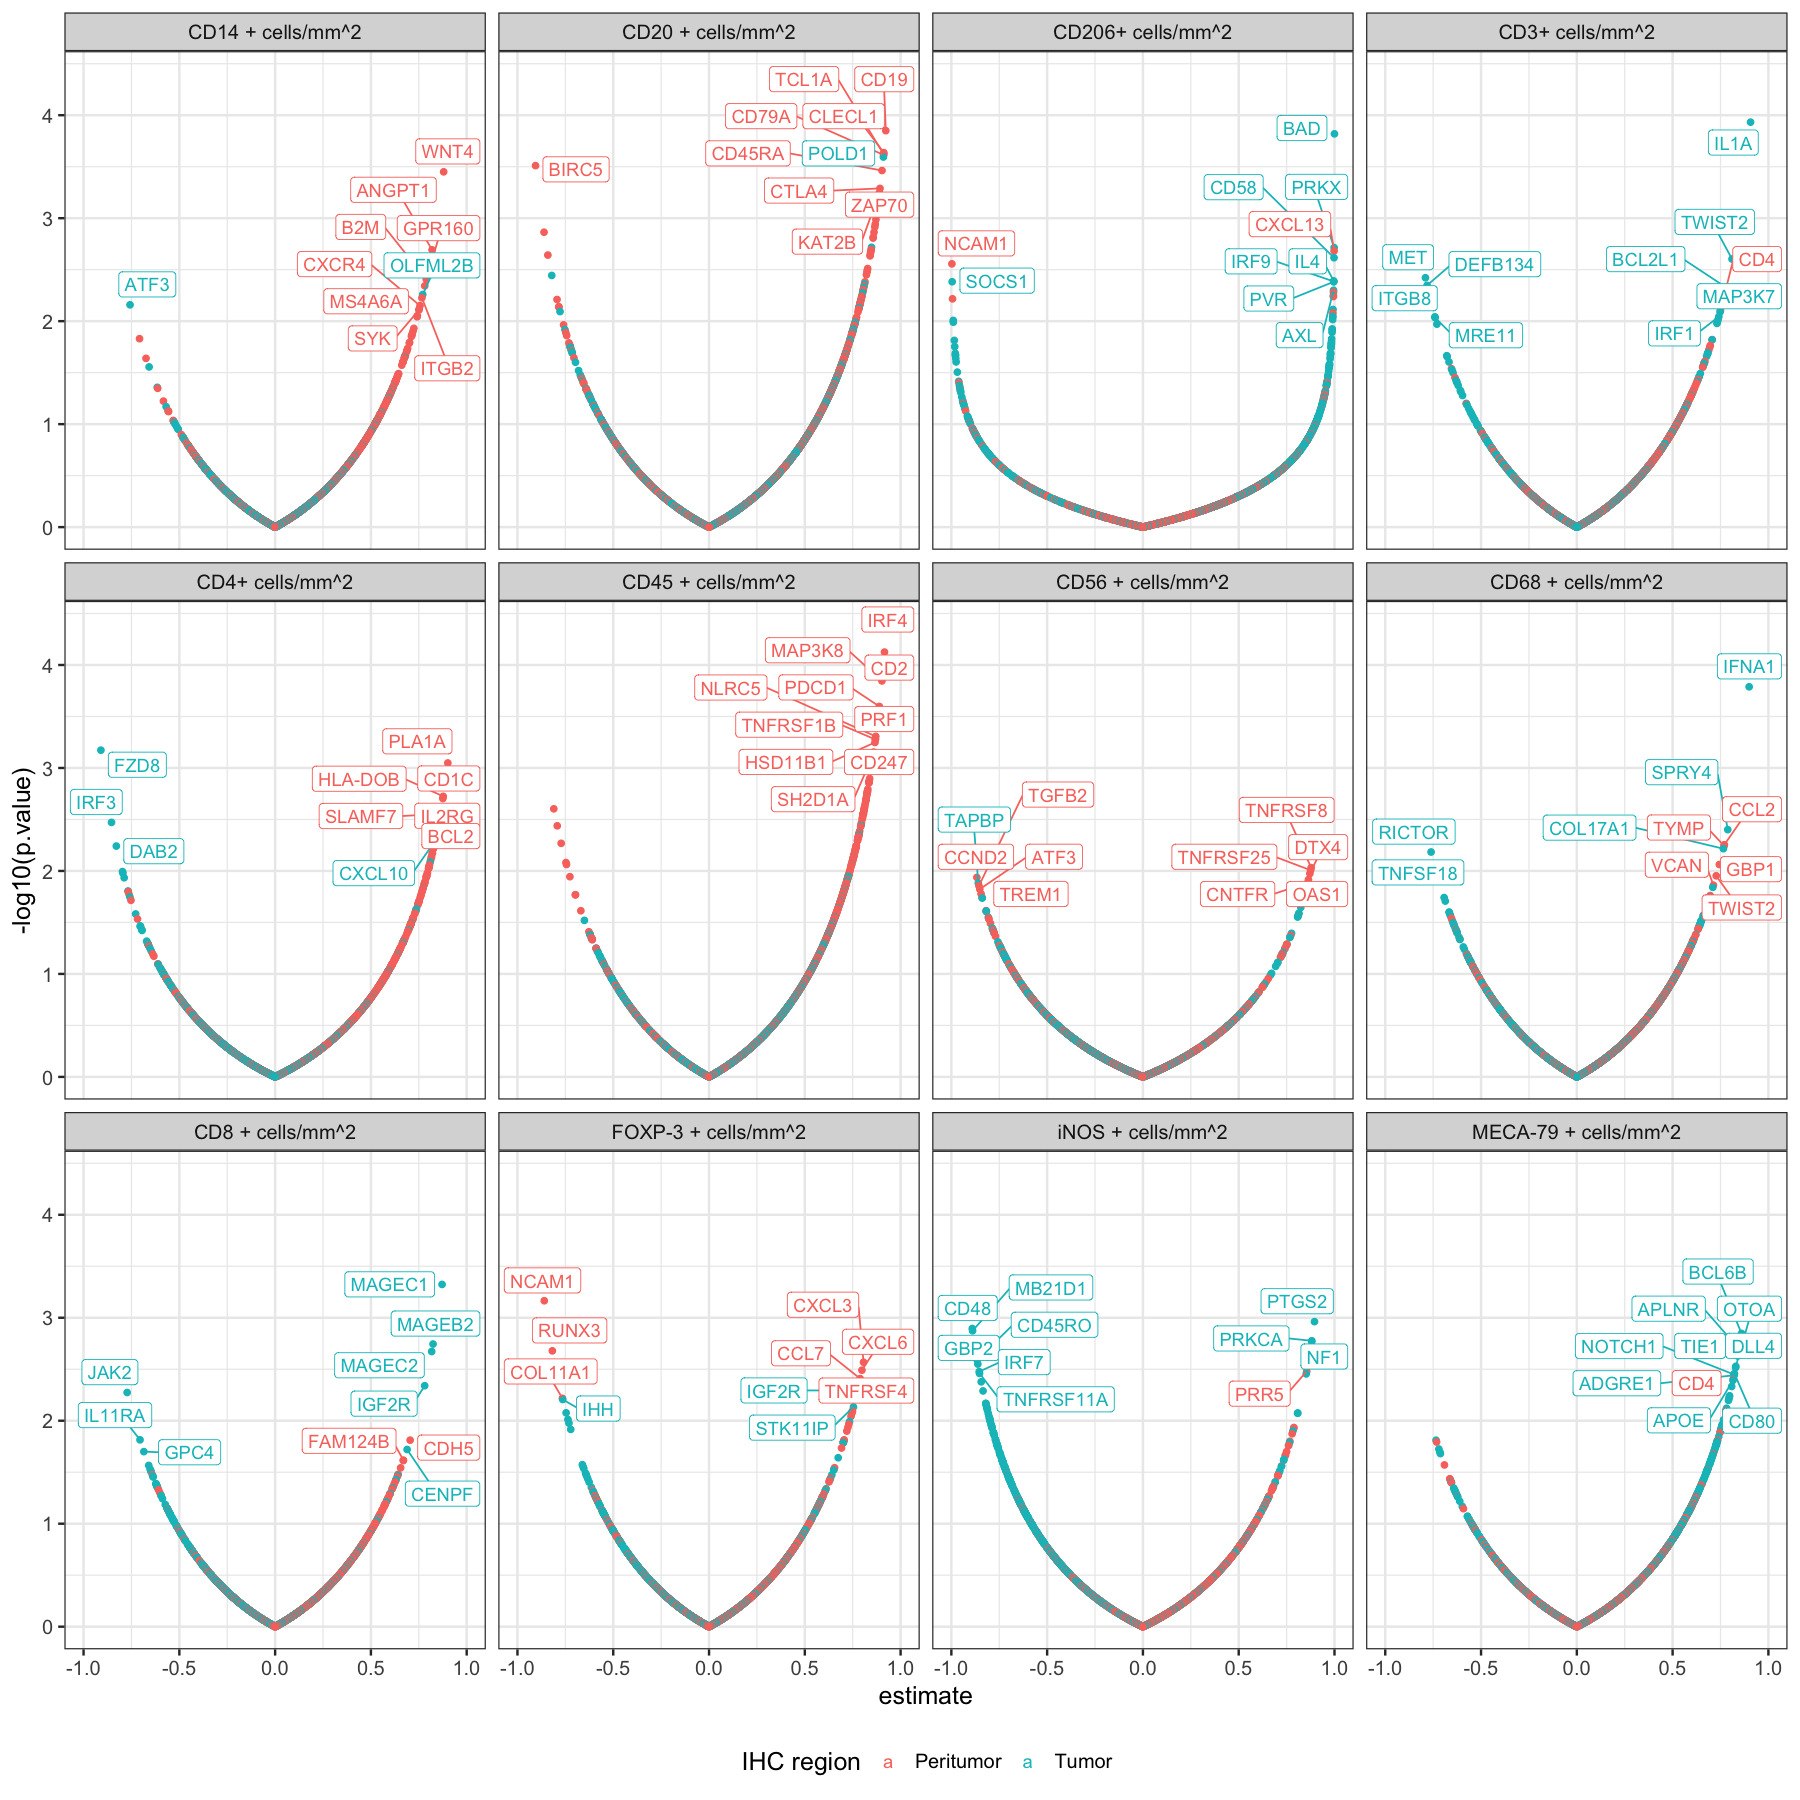

In [25]:
options(repr.plot.width=15, repr.plot.height=15)

cor_tbl %>%
    group_by(`ihc_metric`) %>%
    arrange(`p.value`) %>%
    mutate(`rank`=1:n()) %>%
    ungroup() %>%
    mutate(`label`=case_when(`rank` <= 10 ~ `gene_symbol`, TRUE ~ '')) %>%
    ggplot(aes(x=`estimate`, y=-log10(`p.value`), color=`ihc_region`)) +
        geom_point() +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf) +
        facet_wrap(~`ihc_metric`) +
        xlim(-1, 1) +
        theme_bw(base_size=15) +
        theme(legend.position='bottom') +
        labs(
            color='IHC region'
        )

options(org_opts)

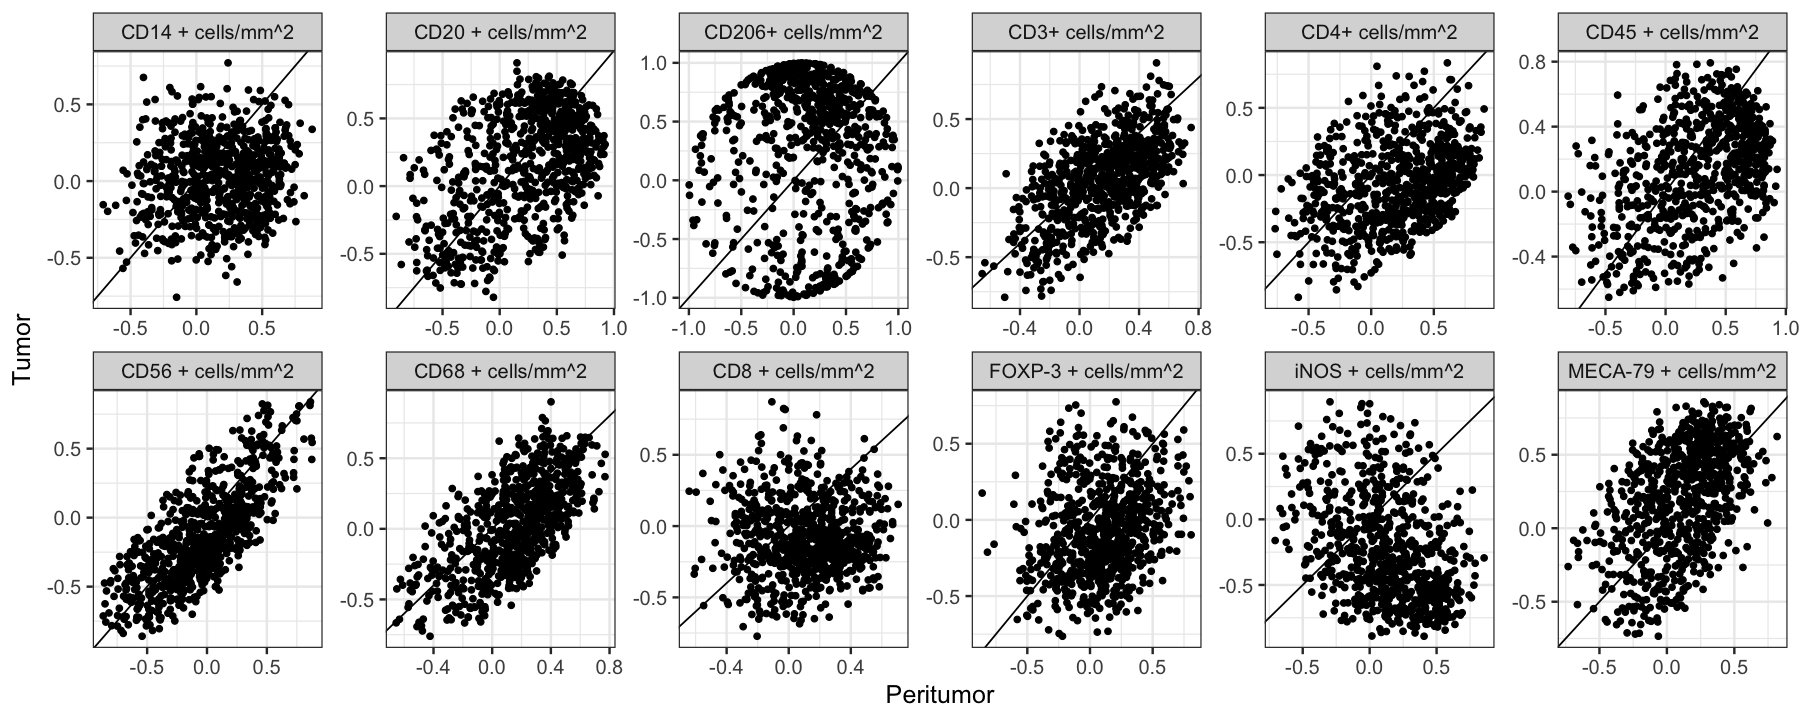

In [26]:
options(repr.plot.width=15, repr.plot.height=6)

cor_tbl %>%
    select(`ihc_metric`, `ihc_region`, `gene_symbol`, `estimate`) %>%
    pivot_wider(
        names_from='ihc_region',
        values_from='estimate',
        id_cols=c(`ihc_metric`, `gene_symbol`)
    ) %>%
    ggplot(aes(x=`Peritumor`, y=`Tumor`)) +
        geom_point() +
        geom_abline(slope=1) +
        facet_wrap(~`ihc_metric`, ncol=6, scale='free') +
        theme_bw(base_size=15)

options(org_opts)

In [27]:
cor_tbl %>%
    filter(`gene_symbol` == 'CD8A') %>%
    arrange(-`estimate`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.89782616,2.8834285,0.10217384,2,-0.46138515,0.9978657,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,CD8A
0.61225336,2.3230672,0.04525797,9,0.01956356,0.8865283,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,CD8A
0.50035946,1.7337117,0.11700129,9,-0.14219618,0.8462345,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,CD8A
0.42780844,0.6693583,0.57219156,2,-0.90564449,0.9842218,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Peritumor,CD8A
0.40932766,1.2689274,0.24013975,8,-0.29678782,0.8260591,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Tumor,CD8A
0.39793061,1.3012553,0.22549461,9,-0.26526559,0.8055208,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Tumor,CD8A
0.38679148,1.1097272,0.30377873,7,-0.37319540,0.8361307,Pearson's product-moment correlation,two.sided,iNOS + cells/mm^2,Peritumor,CD8A
0.21691329,0.6284872,0.54720475,8,-0.47799483,0.7448168,Pearson's product-moment correlation,two.sided,MECA-79 + cells/mm^2,Tumor,CD8A
0.21093601,0.6103501,0.55856573,8,-0.48281312,0.7420147,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CD8A


In [28]:
cor_tbl %>%
    filter(`ihc_metric` == 'CD8 + cells/mm^2') %>%
    arrange(-`estimate`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.8714409,5.329909,0.0004747415,9,0.5690290758,0.9662193,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,MAGEC1
0.8243525,4.368767,0.0018003186,9,0.4440777410,0.9529739,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,MAGEB2
0.8172588,4.254556,0.0021281380,9,0.4264544753,0.9509350,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,MAGEC2
0.7806668,3.747515,0.0045721657,9,0.3400275027,0.9402298,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,IGF2R
0.7047593,2.980179,0.0154450913,9,0.1817018904,0.9169694,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Peritumor,CDH5
0.6890095,2.852048,0.0190255300,9,0.1519301515,0.9119554,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,CENPF
0.6697305,2.705602,0.0241709474,9,0.1167672189,0.9057259,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Peritumor,FAM124B
0.6690459,2.700593,0.0243700217,9,0.1155435813,0.9055028,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Peritumor,DPP4
0.6551345,2.601418,0.0286714560,9,0.0910368445,0.9009408,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Peritumor,FPR3


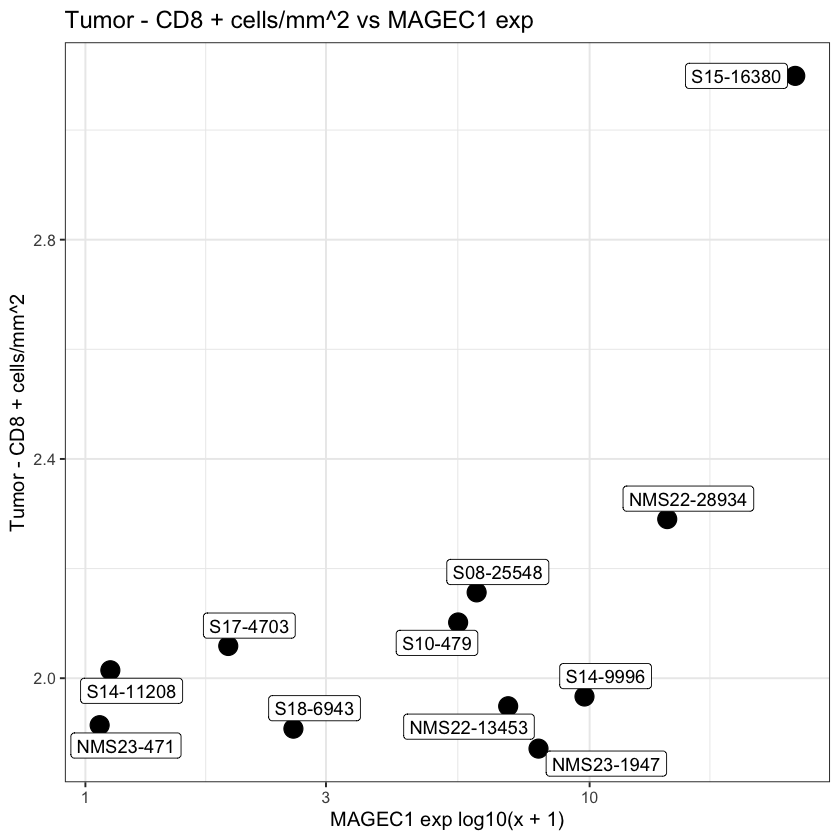

In [29]:
plot_correlation_with_gene('CD8 + cells/mm^2', 'Tumor', 'MAGEC1')

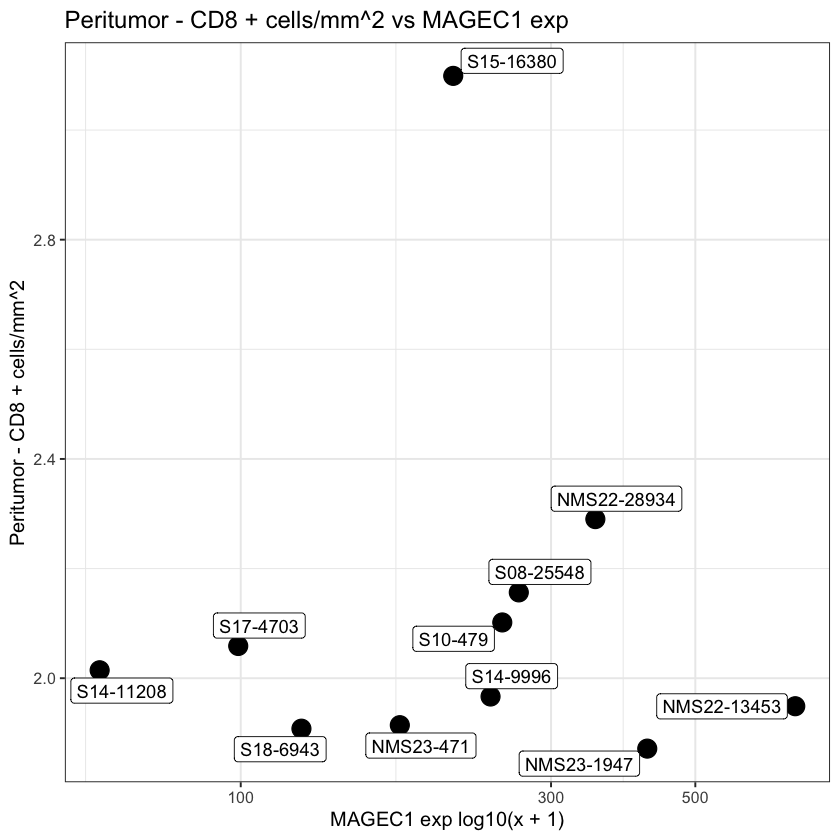

In [30]:
plot_correlation_with_gene('CD8 + cells/mm^2', 'Peritumor', 'MAGEC1')

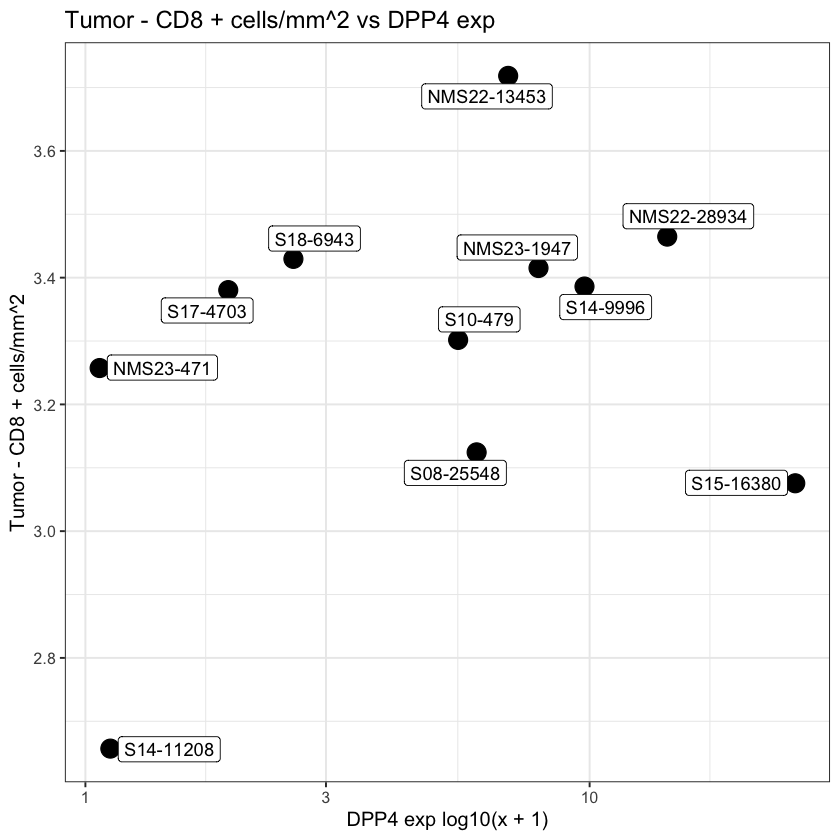

In [31]:
plot_correlation_with_gene('CD8 + cells/mm^2', 'Tumor', 'DPP4')

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 11 rows containing missing values (`geom_label_repel()`).”


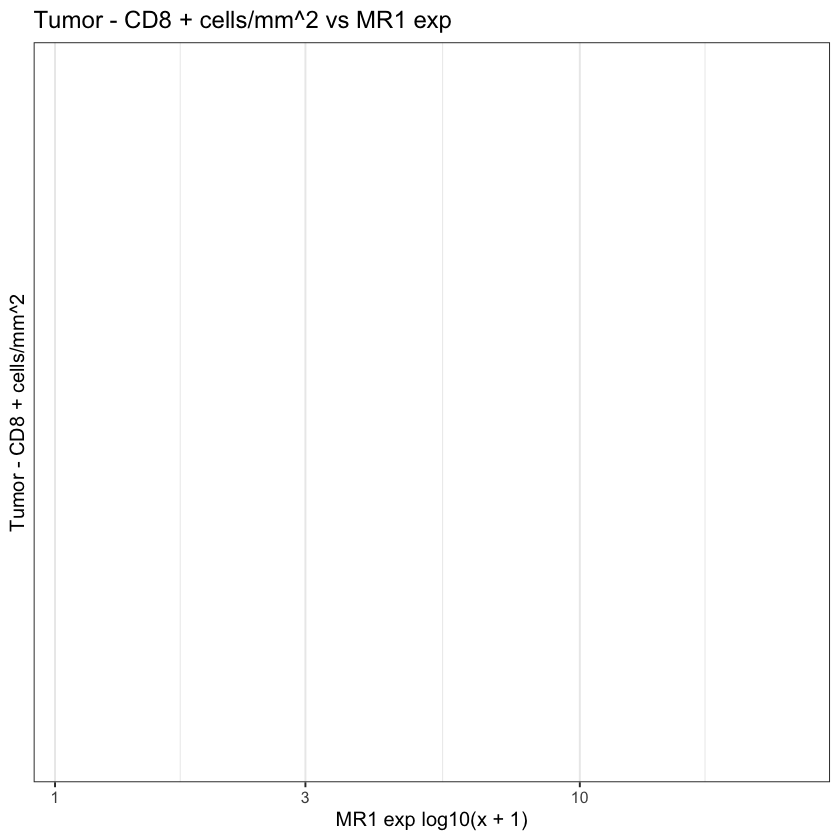

In [32]:
plot_correlation_with_gene('CD8 + cells/mm^2', 'Tumor', 'MR1')

In [33]:
cor_tbl %>%
    write_csv('ihc-vs-exp_log-correlations.csv')